In [4]:
import os, re
curPath = os.getcwd()
match = re.search(pattern=r"^.+?WQD7003_DataAnalytics", string=curPath, flags=re.IGNORECASE)
rootPath = match.group()
os.chdir(rootPath)
os.getcwd()

'c:\\Users\\CHChong\\Documents\\Projects\\WQD7003_DataAnalytics'

In [5]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

from imblearn.ensemble import BalancedBaggingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
DataFilePath_1 = "./data/Heart_2022_Encoded_1.csv"
target_classes = ['HadHeartAttack_No','HadHeartAttack_Yes']

In [7]:
df = pd.read_csv(DataFilePath_1)

In [8]:
df

,oe_1__Sex,oe_2__GeneralHealth,oe_3_1__PhysicalActivities,oe_3_2__HadHeartAttack,oe_3_3__HadAngina,oe_3_4__HadStroke,oe_3_5__HadAsthma,oe_3_6__HadSkinCancer,oe_3_7__HadCOPD,oe_3_8__HadDepressiveDisorder,...,oe_7__ECigaretteUsage,"oe_8__RaceEthnicityCategory_Black only, Non-Hispanic",oe_8__RaceEthnicityCategory_Hispanic,"oe_8__RaceEthnicityCategory_Multiracial, Non-Hispanic","oe_8__RaceEthnicityCategory_Other race only, Non-Hispanic","oe_8__RaceEthnicityCategory_White only, Non-Hispanic",remainder__PhysicalHealthDays,remainder__MentalHealthDays,remainder__SleepHours,remainder__BMI
0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,26.57
1,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,25.61
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,9.0,21.77
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,26.08
4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,22.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329658,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,7.0,29.86
329659,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,31.19
329660,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,7.0,28.66
329661,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,32.55


In [9]:
X = df.drop(columns=['oe_3_2__HadHeartAttack'])
y = df['oe_3_2__HadHeartAttack']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20231231)

# Logistic Regression

In [11]:
model = LogisticRegression(solver='liblinear',random_state=20231231)
model.fit(X_train,y_train)

LogisticRegression(random_state=20231231, solver='liblinear')

In [12]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [13]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(model.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(model.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.96      0.99      0.97    218489
HadHeartAttack_Yes       0.56      0.24      0.34     12275

          accuracy                           0.95    230764
         macro avg       0.76      0.62      0.66    230764
      weighted avg       0.94      0.95      0.94    230764

____________________________________________________________
Training set accuracy: 0.9494
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.96      0.99      0.97     93609
HadHeartAttack_Yes       0.58      0.25      0.34      5290

          accuracy                           0.95     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.884


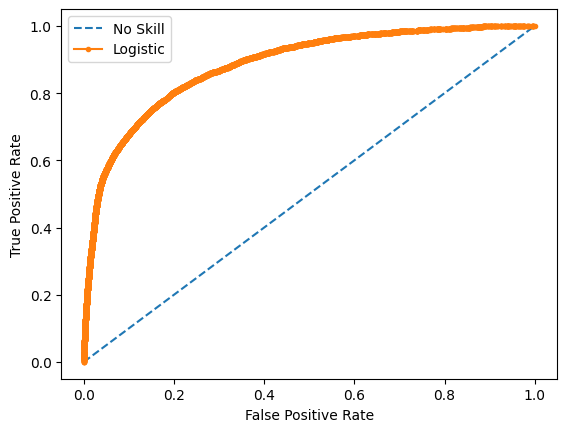

In [14]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<Axes: >

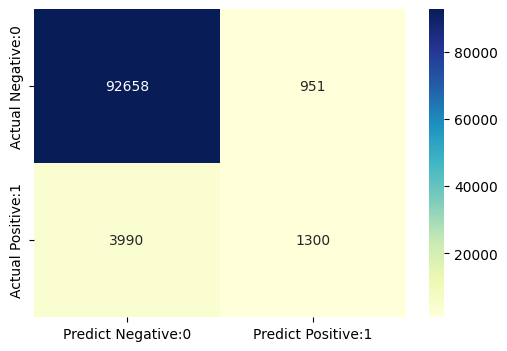

In [15]:
cm = confusion_matrix(y_test,y_test_predict)
# cm
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm,columns=['Predict Negative:0', 'Predict Positive:1'],
                                index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Balanced Bagging

In [16]:
bbc = BalancedBaggingClassifier(estimator=LogisticRegression(solver='liblinear'),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=20231231)

In [17]:
bbc.fit(X_train,y_train)

BalancedBaggingClassifier(estimator=LogisticRegression(solver='liblinear'),
                          random_state=20231231)

In [18]:
y_train_predict = bbc.predict(X_train)
y_test_predict = bbc.predict(X_test)

In [19]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(bbc.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(bbc.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.98      0.84      0.91    218489
HadHeartAttack_Yes       0.21      0.76      0.33     12275

          accuracy                           0.84    230764
         macro avg       0.60      0.80      0.62    230764
      weighted avg       0.94      0.84      0.88    230764

____________________________________________________________
Training set accuracy: 0.8373
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.98      0.84      0.91     93609
HadHeartAttack_Yes       0.22      0.76      0.34      5290

          accuracy                           0.84     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.885


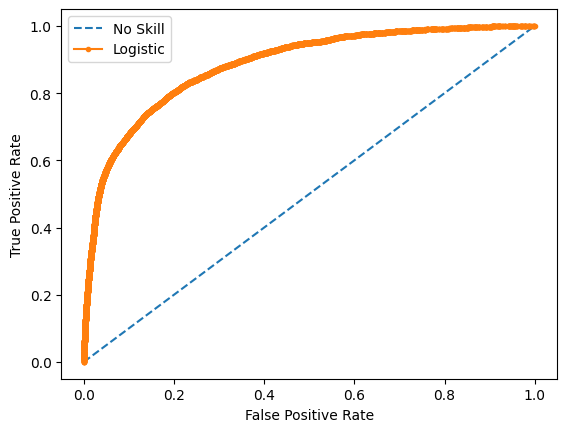

In [20]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = bbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<Axes: >

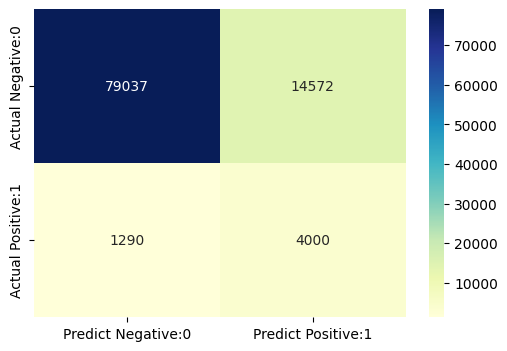

In [21]:
cm = confusion_matrix(y_test,y_test_predict)
# cm
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm,columns=['Predict Negative:0', 'Predict Positive:1'],
                                index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Hyperparameter Tuning
- ROC AUC and Recall

In [22]:
# define parameters
solvers = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
met_grid = ['precision','recall','f1','roc_auc']

In [23]:
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# grid = {
#     'estimator__solver':solvers,
#     'estimator__penalty':penalty,
#     'estimator__C':c_values
# }
# cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=20231231)
# grid_search = GridSearchCV(estimator=bbc,param_grid=grid,n_jobs=-1,cv=cv,scoring=met_grid,refit='recall')
# grid_result = grid_search.fit(X_train, y_train)

In [24]:
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# mean_recall = grid_result.cv_results_['mean_test_recall']
# std_recall = grid_result.cv_results_['std_test_recall']
# mean_roc_auc = grid_result.cv_results_['mean_test_roc_auc']
# std_roc_auc = grid_result.cv_results_['std_test_roc_auc']
# rank_test_recall = grid_result.cv_results_['rank_test_recall']
# params = grid_result.cv_results_['params']
# for rank_test_recall, mean_recall, std_recall, mean_roc_auc, std_roc_auc, params in zip(rank_test_recall, mean_recall, std_recall, mean_roc_auc, std_roc_auc, params):
#     print("Rank: %i, Recall: %f (%f), ROC AUC: %f (%f) with: %r" % (rank_test_recall, mean_recall, std_recall, mean_roc_auc, std_roc_auc, params))
# grid_result.cv_results_

## Tuned Model

In [25]:
bbc = BalancedBaggingClassifier(estimator=LogisticRegression(solver='newton-cg',penalty='l2',C=0.01),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=20231231)

In [26]:
bbc.fit(X_train,y_train)

BalancedBaggingClassifier(estimator=LogisticRegression(C=0.01,
                                                       solver='newton-cg'),
                          random_state=20231231)

In [27]:
y_train_predict = bbc.predict(X_train)
y_test_predict = bbc.predict(X_test)

In [28]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train,y_train_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(bbc.score(X_train,y_train)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test,y_test_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(bbc.score(X_test,y_test)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.98      0.83      0.90    218489
HadHeartAttack_Yes       0.20      0.77      0.32     12275

          accuracy                           0.82    230764
         macro avg       0.59      0.80      0.61    230764
      weighted avg       0.94      0.82      0.87    230764

____________________________________________________________
Training set accuracy: 0.8248
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.98      0.83      0.90     93609
HadHeartAttack_Yes       0.20      0.77      0.32      5290

          accuracy                           0.83     98899
         macro avg       0.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.883


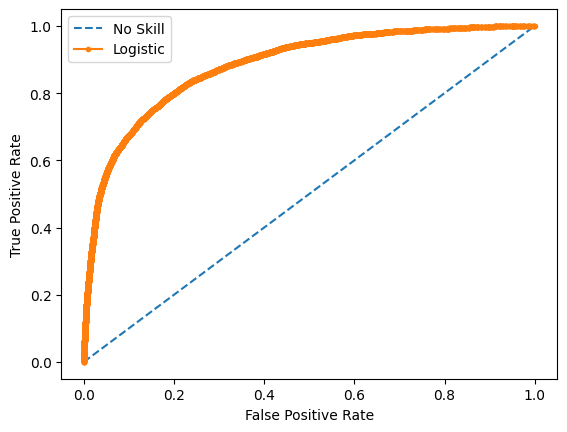

In [29]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = bbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<Axes: >

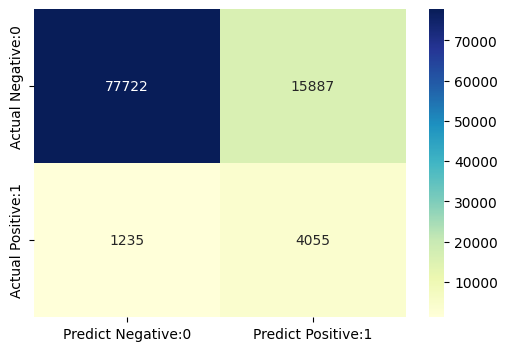

In [30]:
cm = confusion_matrix(y_test,y_test_predict)
# cm
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm,columns=['Predict Negative:0', 'Predict Positive:1'],
                                index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [31]:
np.sum(y_test)

5290.0

In [32]:
np.sum(y_test_predict)

19942.0

# Selected Features

In [37]:
DataFilePath_2 = "./data/FeatureSelection_1_DataOut_1.csv"
df_fs = pd.read_csv(DataFilePath_2)
df_fs

,oe_1__Sex,oe_2__GeneralHealth,oe_3_1__PhysicalActivities,oe_3_3__HadAngina,oe_3_10__HadArthritis,oe_3_11__AlcoholDrinkers,oe_4__HadDiabetes,oe_5__AgeCategory,oe_6__SmokerStatus,"oe_8__RaceEthnicityCategory_White only, Non-Hispanic",remainder__SleepHours,oe_3_2__HadHeartAttack
0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0
1,0.0,3.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,7.0,0.0
2,0.0,2.0,0.0,0.0,1.0,0.0,0.0,11.0,1.0,0.0,8.0,0.0
3,1.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,3.0,8.0,0.0,1.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
329658,0.0,2.0,0.0,0.0,1.0,1.0,0.0,12.0,1.0,1.0,12.0,1.0
329659,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,8.0,0.0
329660,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,3.0,1.0,3.0,0.0
329661,1.0,3.0,1.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,8.0,0.0


In [39]:
X = df.drop(columns=['oe_3_2__HadHeartAttack'])
y = df['oe_3_2__HadHeartAttack']
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.3,random_state=20240101)


In [40]:
bbc = BalancedBaggingClassifier(estimator=LogisticRegression(solver='newton-cg',penalty='l2',C=0.01),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=20231231)
bbc.fit(X_train_fs,y_train_fs)
y_train_fs_predict = bbc.predict(X_train_fs)
y_test_fs_predict = bbc.predict(X_test_fs)

In [41]:
print("Training Dataset")
print("_"*60)
print(classification_report(y_train_fs,y_train_fs_predict,target_names=target_classes))
print("_"*60)
print("Training set accuracy: {:.4f}".format(bbc.score(X_train_fs,y_train_fs)))
print("_"*60)
print("#"*60)
print("Testing Dataset")
print("_"*60)
print(classification_report(y_test_fs,y_test_fs_predict,target_names=target_classes))
print("_"*60)
print("Testing set accuracy: {:.4f}".format(bbc.score(X_test_fs,y_test_fs)))
print("_"*60)
print("#"*60)

Training Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.98      0.83      0.90    218451
HadHeartAttack_Yes       0.20      0.77      0.32     12313

          accuracy                           0.83    230764
         macro avg       0.59      0.80      0.61    230764
      weighted avg       0.94      0.83      0.87    230764

____________________________________________________________
Training set accuracy: 0.8259
____________________________________________________________
############################################################
Testing Dataset
____________________________________________________________
                    precision    recall  f1-score   support

 HadHeartAttack_No       0.98      0.83      0.90     93647
HadHeartAttack_Yes       0.20      0.76      0.32      5252

          accuracy                           0.83     98899
         macro avg       0.